In [2]:
import tensorflow as tf
import os

/Users/mrbinit/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Train dataset length: 25000
Test dataset length: 10000
Validation dataset length: 15000


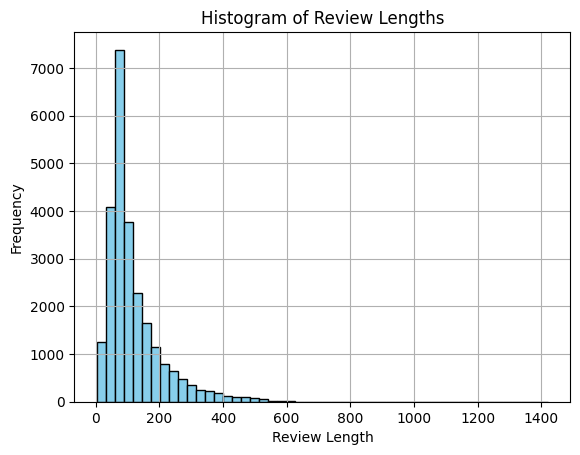

In [3]:
def load_dataset(directory, label):
    data = []
    for filename in os.listdir(directory):
        with open(os.path.join(directory, filename), 'r') as file:
            review = file.read()
            data.append((review, label))
    return data

directory_path = "/Users/mrbinit/Downloads/aclImdb" 

train_pos_dir = os.path.join(directory_path, 'train', 'pos')
train_neg_dir = os.path.join(directory_path, 'train', 'neg')
test_pos_dir = os.path.join(directory_path, 'test', 'pos')
test_neg_dir = os.path.join(directory_path, 'test', 'neg')
val_pos_dir = os.path.join(directory_path, 'val', 'pos')
val_neg_dir = os.path.join(directory_path, 'val', 'neg')

train_data = load_dataset(train_pos_dir, 1) + load_dataset(train_neg_dir, 0) #1 represents positive and 0 represents negative sentiments
test_data = load_dataset(test_pos_dir, 1) + load_dataset(test_neg_dir, 0)

#split the test set into a validation set (15,000 samples) and a test set (10,000 samples)
val_data = test_data[:15000]
test_data = test_data[15000:25000]

#separate the reviews and labels from the train, test, and validation data
train_reviews, train_labels = zip(*train_data)
test_reviews, test_labels = zip(*test_data)
val_reviews, val_labels = zip(*val_data)

#check the lengths of train, test, and validation datasets
train_length = len(train_reviews)
test_length = len(test_reviews)
val_length = len(val_reviews)

print("Train dataset length:", train_length)
print("Test dataset length:", test_length)
print("Validation dataset length:", val_length)

# Load libraries and preprocess data (same as before)
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import contractions
from spellchecker import SpellChecker  

# Load the English model
nlp = spacy.load("en_core_web_sm")

# Initialize the spell checker
spell_checker = SpellChecker()

# Identifies stop words and removes
def remove_Stop_words(text):
    # Expand contraction 
    expanded_text = contractions.fix(text)
    words = word_tokenize(expanded_text)
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Data cleaning function
def data_cleaning(text):
    # Convert text to lower case
    text = text.lower()
    # Remove HTML tags
    clean_text = re.sub(r'<.*?>', '', text)
    # Remove URLs
    clean_text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', clean_text)
    # Remove special characters
    clean_text = re.sub(r'[^a-zA-Z0-9\s]', '', clean_text)
    # Handles stop words
    clean_text = remove_Stop_words(clean_text)
    return clean_text

# Function to extend words using spaCy
def extend_words_with_spacy(text):
    doc = nlp(text)
    extended_text = ' '.join([token.lemma_ for token in doc])
    return extended_text

# Function to check spelling
def spell_check(text):
    corrected_text = ' '.join([spell_checker.correction(word) for word in text.split()])
    return corrected_text

# Apply data cleaning, lemmatization, and word extension to train data
cleaned_train_data = []
for review, label in train_data:
    cleaned_review = data_cleaning(review)
    if cleaned_review is not None:  
        cleaned_review = extend_words_with_spacy(cleaned_review)
        cleaned_train_data.append((cleaned_review, label))
    else:
        print("Skipping review with None result after cleaning:", review)

# Apply data cleaning, lemmatization, and word extension to test data
cleaned_test_data = [(extend_words_with_spacy(data_cleaning(review)), label) for review, label in test_data]

# Apply data cleaning, lemmatization, and word extension to validation data
cleaned_val_data = [(extend_words_with_spacy(data_cleaning(review)), label) for review, label in val_data]

# Now, you can plot the histogram using the cleaned_train_data
import matplotlib.pyplot as plt

# Get the lengths of reviews
review_lengths = [len(review.split()) for review, label in cleaned_train_data]

# Plot histogram
plt.hist(review_lengths, bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Histogram of Review Lengths')
plt.grid(True)
plt.show()
